In [2]:
#Add Dependencies
#=============================
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [3]:
#Add dependencies
#=======================
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
#=======================================================
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
#Create engine to hawaii.sqlite/add inspector/fix the path(Add /Resources)
#==========================================================================
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [6]:
#Reflect an existing database into a new model /Create your Automap_base
#===========================================================================
Base = automap_base()

In [7]:
#Reflect the tables/Use base.prepare(engine)
#===================================================
Base.prepare(engine, reflect=True)

In [8]:
#View all of the classes that automap found
#==================================================
Base.classes.keys()

['measurement', 'station']

In [9]:
#Save references to each table
#================================================
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
#Using inspector to get column names and types
#==========================================================
measurement_columns = inspector.get_columns('measurement')
for c in measurement_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#using inspector get column names and types for station
#=======================================================
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Create our session (link) from Python to the DB
#=====================================================
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
#Find the most recent date in the data set.
#Using engine execute to query for the most recent date.
#==================================================================
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

In [14]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#==========================================================================================
inspector.get_table_names()
columns = inspector.get_columns('measurment')

session.query(Measurement.date, Measurement.prcp).all()

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [15]:
#Starting from the most recent data point in the database. 
#==================================================================
end_date = session.query(func.max(Measurement.date)).scalar()
print(end_date)

2017-08-23


In [16]:
#Calculate the date one year from the last date in data set.
#===============================================================================
date1yr_dt = dt.datetime.strptime(end_date, '%Y-%m-%d') -dt.timedelta(days=365)
query_date = date1yr_dt.strftime('%Y-%m-%d')
print(query_date)

2016-08-23


In [17]:
#Perform a query to retrieve the data and precipitation scores
#===================================================================
final_year = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').all()

#Results
final_year

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [18]:
#Save the query results as a Pandas DataFrame
#===========================================================================
final_year_df = pd.DataFrame(final_year, columns=['Date', 'Precipitation'])

#Results
final_year_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [19]:
#Set the index to the date column
#================================================
final_year_df = final_year_df.set_index("Date")

#Results
final_year_df.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [20]:
#Sort the dataframe by date
#======================================================
get_sorted_df = final_year_df.sort_values(by = "Date")

#Results
get_sorted_df.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


(-0.4, 7.0)

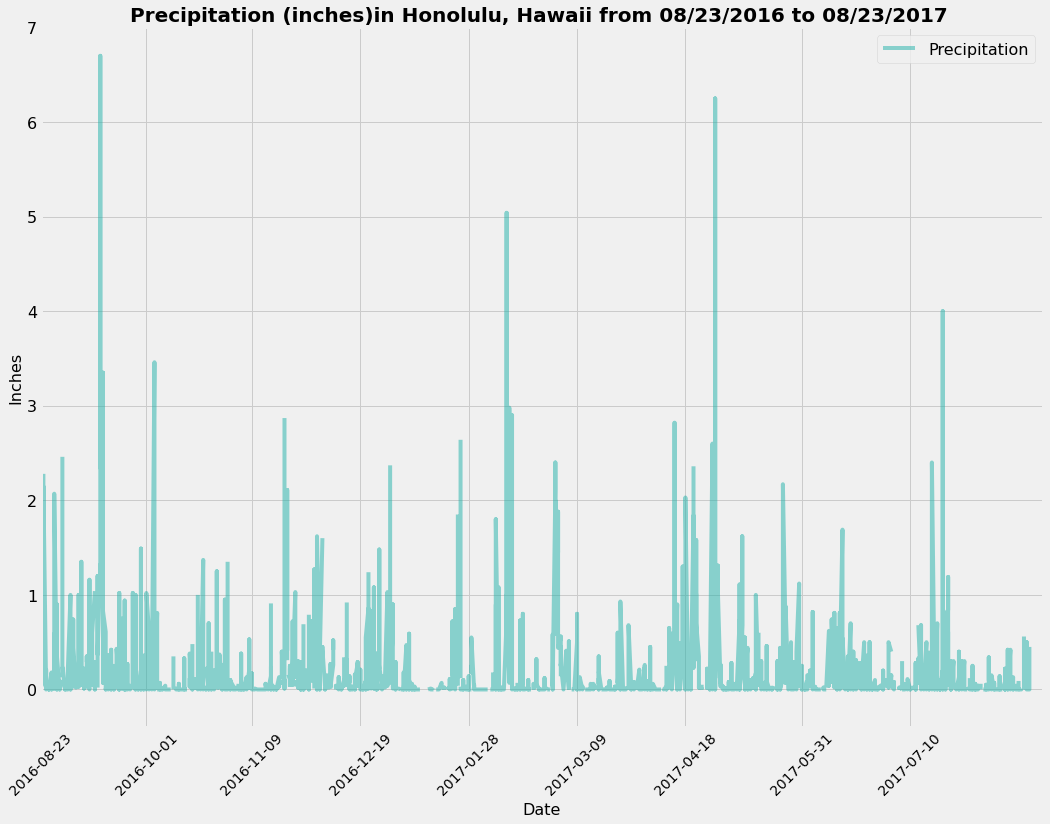

In [25]:
#Use Pandas Plotting with Matplotlib to plot the data
#========================================================================================================

#Set plot and plot the chart

plt.figure(figsize=(16, 12))
plt.plot(get_sorted_df.index, get_sorted_df['Precipitation'], color='lightseagreen', alpha=.5)

#Adding a legned
plt.legend(['Precipitation'], loc="upper right", fontsize=16)

#Setting X location
xloc = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', \
        '2017-03-09', '2017-04-18','2017-05-31','2017-07-10'] 

#Assigning ticks
plt.xticks(xloc, rotation=45,fontsize=14)

#Creating Labels & Title
plt.xlabel('Date', fontsize=16)
plt.ylabel("Inches",fontsize=16)
plt.title("Precipitation (inches)in Honolulu, Hawaii from 08/23/2016 to 08/23/2017 ", fontsize=20, fontweight = 'bold')
plt.yticks(size=16)

#Assigning xlim and ylim
plt.xlim(0,370)
plt.ylim(-0.4,7)


#Save Figure
#plt.savefig(Images/Precipitation_Plot.png



In [26]:
#Use Pandas to calcualte the summary statistics for the precipitation data
#============================================================================
#Using the descibe function to get some basic statistical details like
#percentile, mean, std etc. of a data frame or a series of numeric values

get_sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset
#==============================================================================
#Count how many station ID's there are to get total number
session.query(Station.id).count()

9

In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#============================================================================================
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

#Results
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#====================================================================================================================
station_number = 'USC00519281'
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station.
#======================================================================================
results = session.query(Measurement.tobs).\
            filter(Measurement.date.between(query_date, end_date),\
                   Measurement.station == 'USC00519281').all()

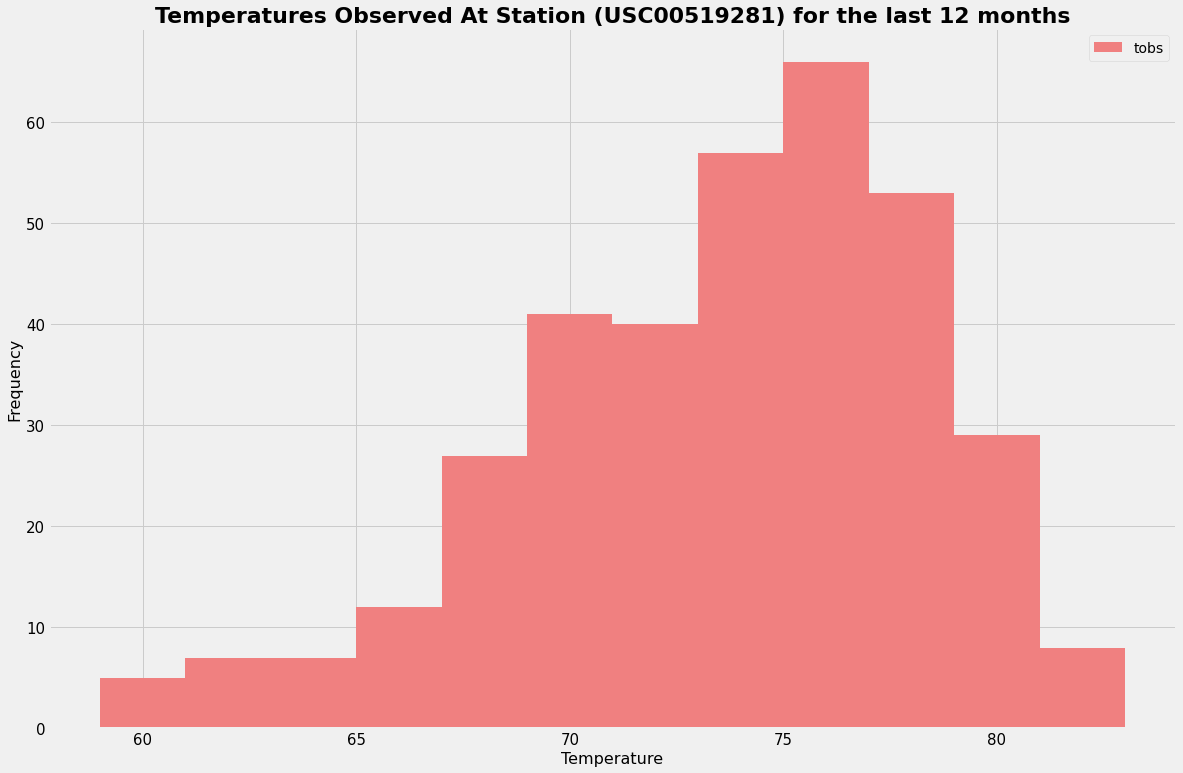

In [31]:
#Plot the results as a histogram
#===================================================================================================================
plt.figure(figsize=(18,12))
plt.hist(np.ravel(results), color='lightcoral', bins=12)

#Create Title and labels
plt.title('Temperatures Observed At Station (USC00519281) for the last 12 months',fontsize=22, fontweight = 'bold')
plt.xlabel('Temperature',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

#Create legend
plt.legend(['tobs'], loc = 'upper right')


plt.yticks(size=15)
plt.xticks(size=15)
plt.show()

# Close session

In [32]:
# Close Session
session.close()